In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
raw_data = pd.read_csv('sim_data.csv')
x = raw_data[['Hs', 'T', 'Pth']]
y = raw_data['speed']

0.04576183141504804
0.038799530296732394


'\nresult: KNN\n0.03900098162751021\n0.0036196296467931326\n0.06016335800795308\n'

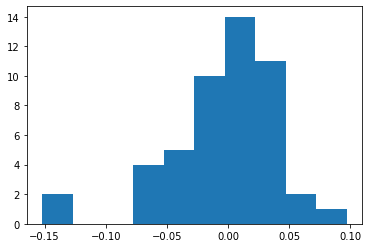

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

model = KNeighborsRegressor() #svm.SVR() #MLPRegressor(hidden_layer_sizes=(10)) #SGDRegressor() #LinearRegression()
model.fit(x_train, y_train)

#print(model.coef_)
#print(model.intercept_)

#pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
predictions = model.predict(x_test)
# plt.scatter(y_test, predictions)
plt.hist(y_test - predictions)

from sklearn import metrics
#print(metrics.mean_absolute_error(y_test, predictions))
#print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
predictions = model.predict(x_train)
print(np.sqrt(metrics.mean_squared_error(y_train, predictions)))
'''
results: Linear Regression
0.05135208892230201
0.003954137360649127
0.06288193190932612
'''

'''
results: SDG Regressor
0.08430668182774864
0.011445376303353677
0.10698306549802018
'''

'''
result: SVM
0.05511844307485899
0.0051838153768574025
0.07199871788342764
'''

'''
result: KNN
0.03900098162751021
0.0036196296467931326
0.06016335800795308
'''

In [20]:
# save model
import pickle
filename = 'speed_model_knn.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)